# Sprint 08

Importamos librerías y leemos el csv.

In [370]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

data = pd.read_csv('bank_dataset.csv')

Transformamos los valores nulos con la media en el caso de columnas numéricas y con la moda en caso de columnas categóricas

In [371]:
# Preguntar
print("Tenemos valores nulos?")
print(data.isna().sum())

# Solucionar
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  #columna numérica
        media = data[column].mean()  #media
        data[column] = data[column].fillna(media)  #reemplazar
    else:  #categórica
        moda = data[column].mode().iloc[0]  #moda
        data[column] = data[column].fillna(moda)  #reemplazar

# Confirmar
print("\nTenemos valores nulos?")
print(data.isna().sum())

Tenemos valores nulos?
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Tenemos valores nulos?
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


## Análisis exploratorio EDA

In [372]:
# Primeras filas
print("Primeras filas")
print(data.head())
# Info
print("Info")
print(data.info())
# Resumen estadístico
print("Resumen estadístico")
print(data.describe())
print("Valores únicos por columna")
print(data.nunique())

Primeras filas
    age         job  marital  education default  balance housing loan  \
0  59.0      admin.  married  secondary      no     2343     yes   no   
1  56.0      admin.  married  secondary      no       45      no   no   
2  41.0  technician  married  secondary      no     1270     yes   no   
3  55.0    services  married  secondary      no     2476     yes   no   
4  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes  
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 111

Eliminamos la variable 'pdays', ya que al menos el 50% de los valores es '-1', que podría considerarse como un valor nulo.

Distribución de job:
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64




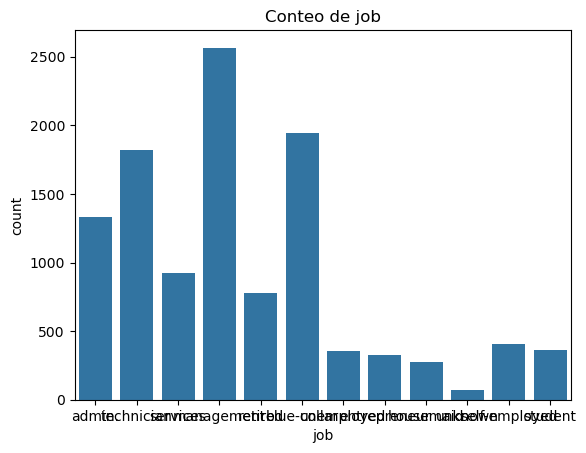

Distribución de marital:
marital
married     0.569253
single      0.315087
divorced    0.115660
Name: proportion, dtype: float64




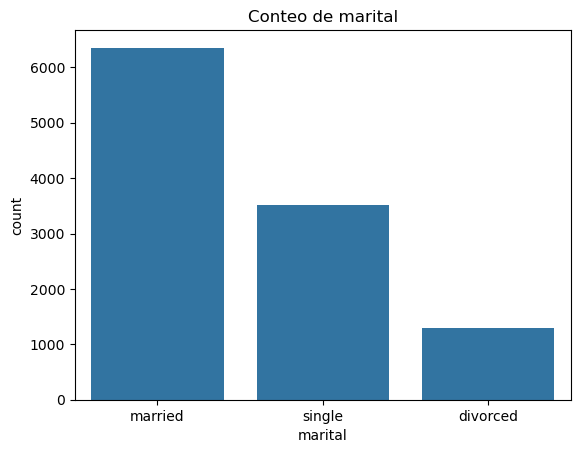

Distribución de education:
education
secondary    0.491041
tertiary     0.330138
primary      0.134385
unknown      0.044436
Name: proportion, dtype: float64




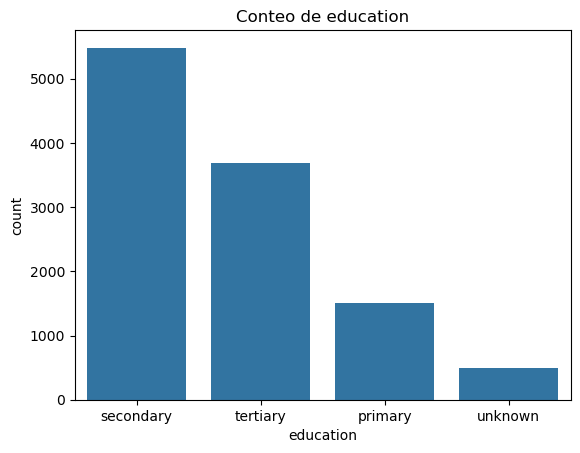

Distribución de default:
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64




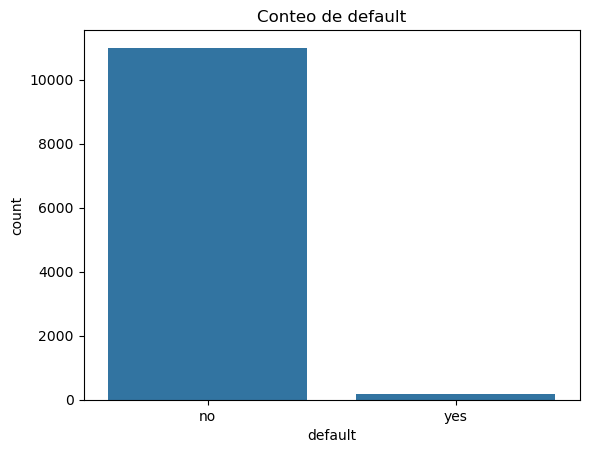

Distribución de housing:
housing
no     0.526877
yes    0.473123
Name: proportion, dtype: float64




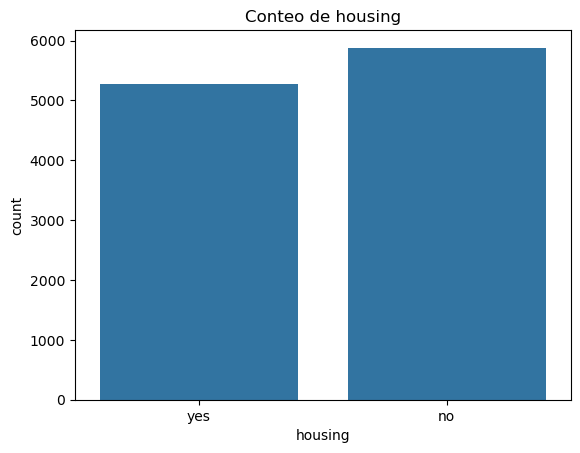

Distribución de loan:
loan
no     0.869199
yes    0.130801
Name: proportion, dtype: float64




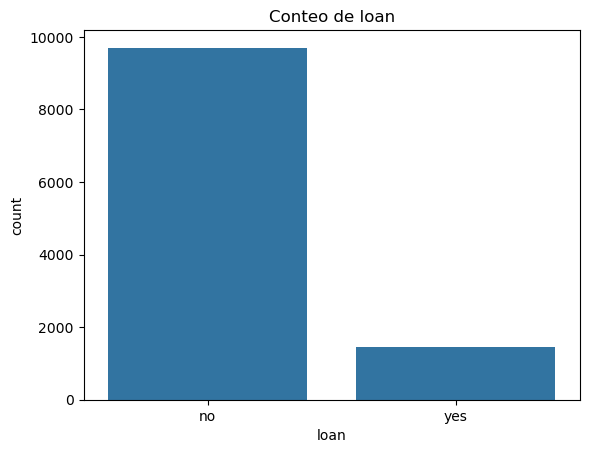

Distribución de contact:
contact
cellular     0.720480
unknown      0.210177
telephone    0.069342
Name: proportion, dtype: float64




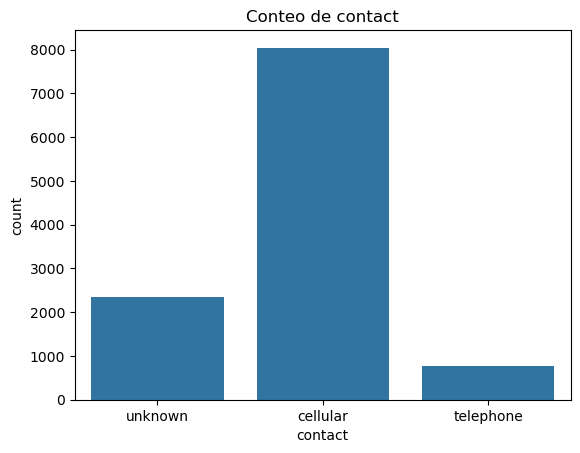

Distribución de month:
month
may    0.253001
aug    0.136087
jul    0.135639
jun    0.109479
nov    0.084483
apr    0.082691
feb    0.069522
oct    0.035119
jan    0.030819
sep    0.028579
mar    0.024727
dec    0.009855
Name: proportion, dtype: float64




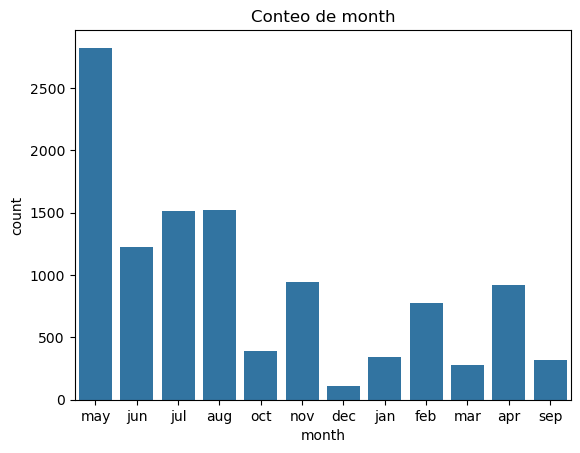

Distribución de poutcome:
poutcome
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: proportion, dtype: float64




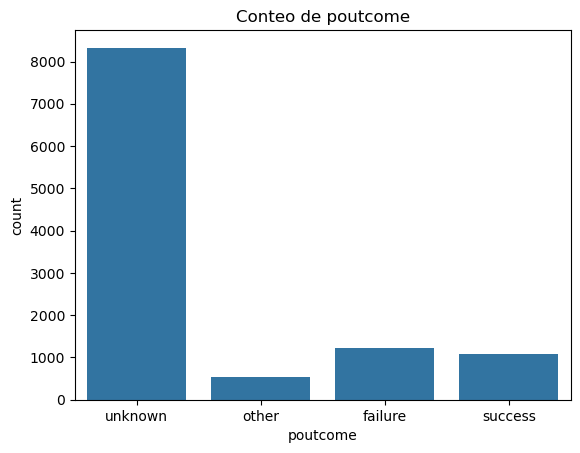

Distribución de deposit:
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64




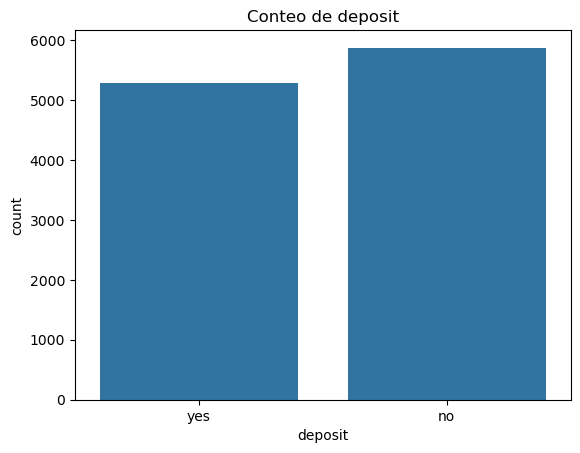

In [373]:
# Conteo de valores únicos por variable categórica
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Distribución de {col}:")
    print(data[col].value_counts(normalize=True))
    print("\n")

    # Gráfico de barras
    sns.countplot(x=col, data=data)
    plt.title(f"Conteo de {col}")
    plt.show()

Eliminaremos las variables:
- 'poutcome', por tener una gran cantidad de valores 'unknown'
- 'default' y 'loan', ya que el 98.5% de los valores son "no", mientras que solo el 1.5% son "yes" en el caso de 'default'. Esto significa que la variable tiene muy poca variabilidad y, por lo tanto, es poco probable que contribuya significativamente al modelo o análisis.

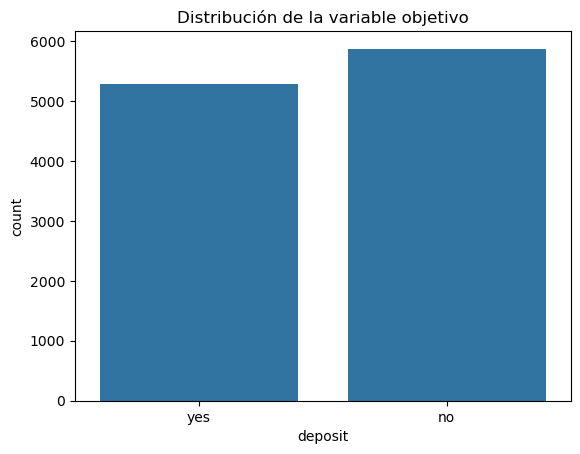

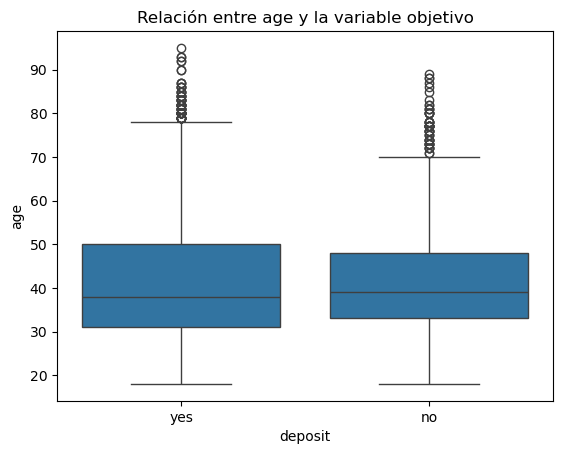

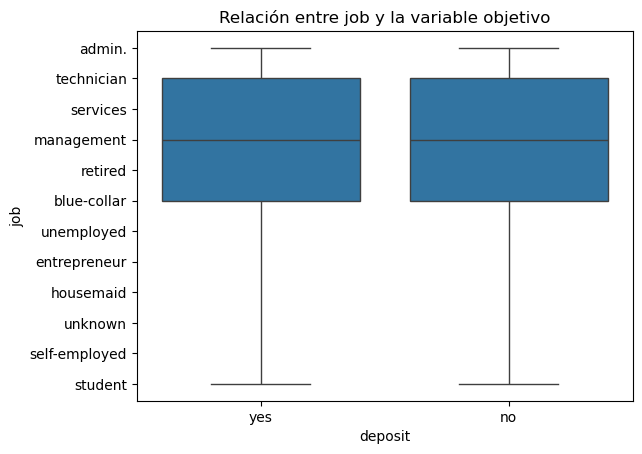

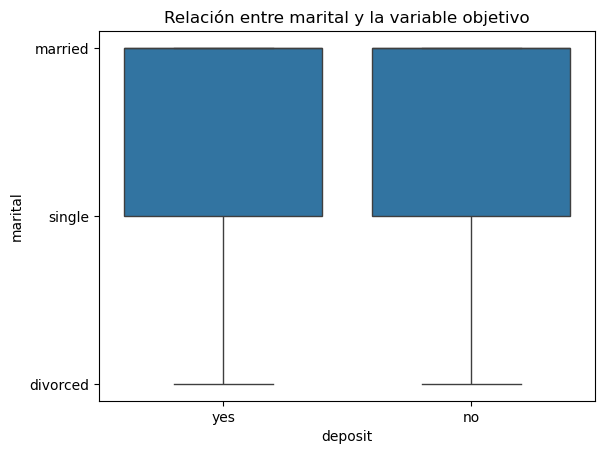

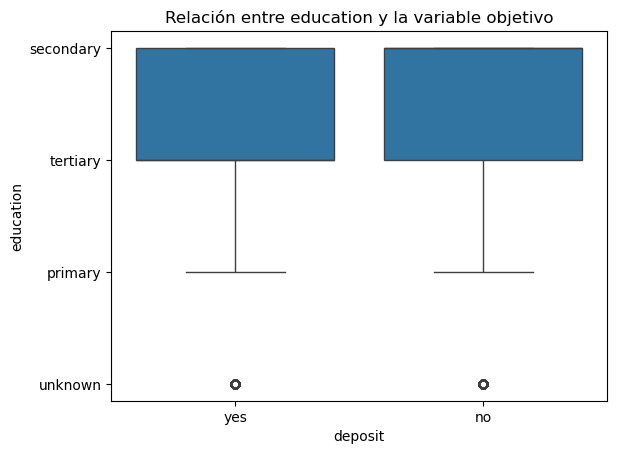

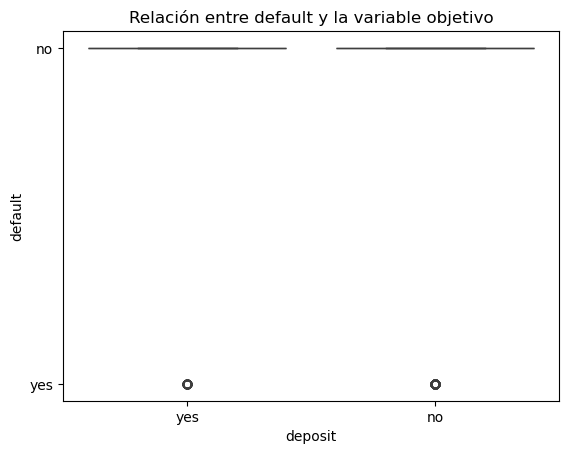

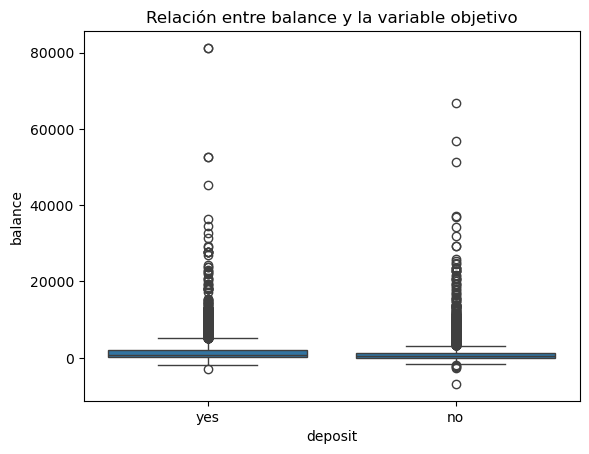

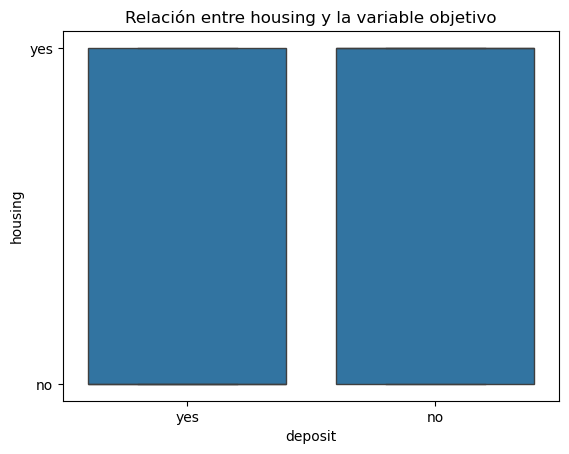

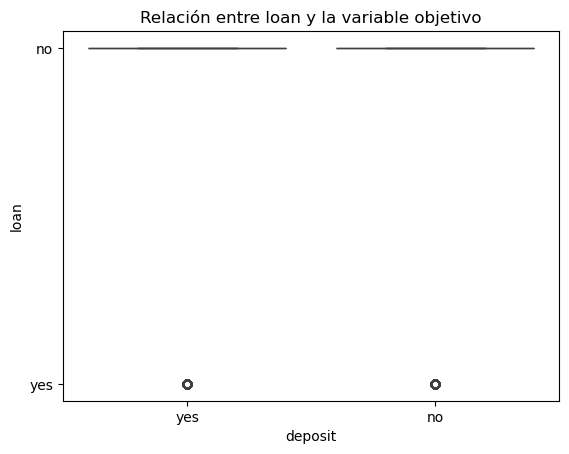

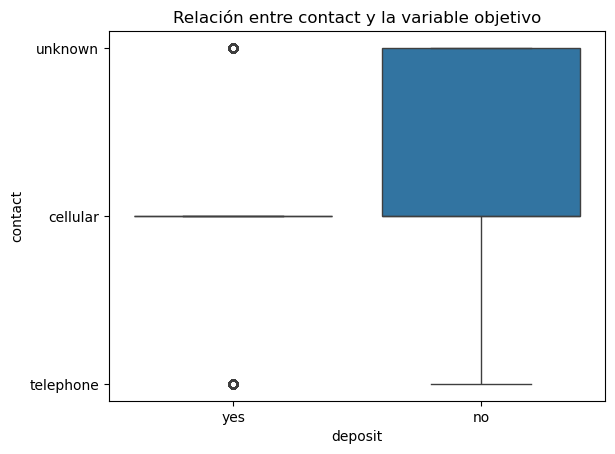

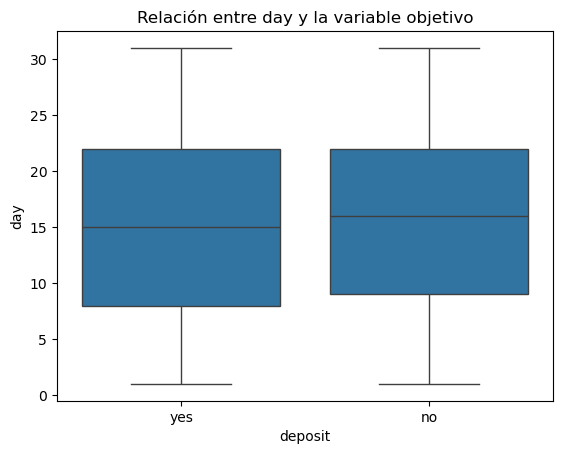

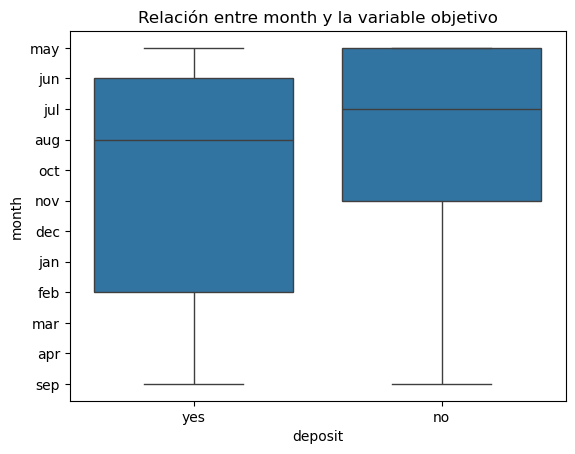

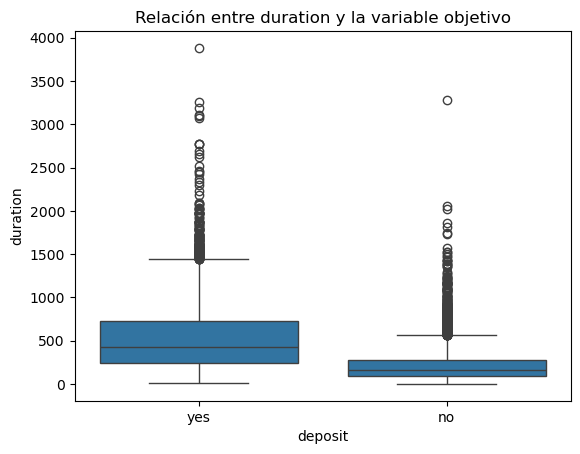

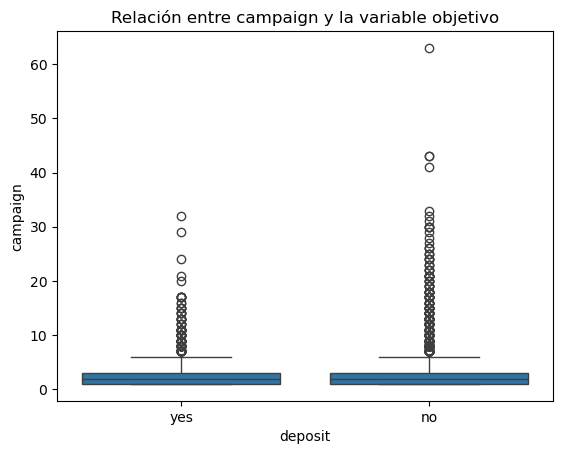

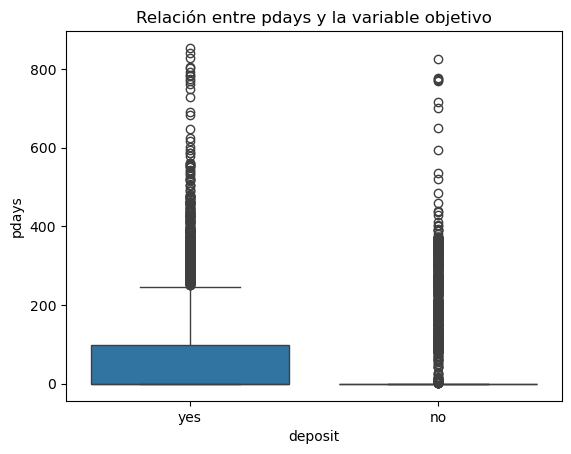

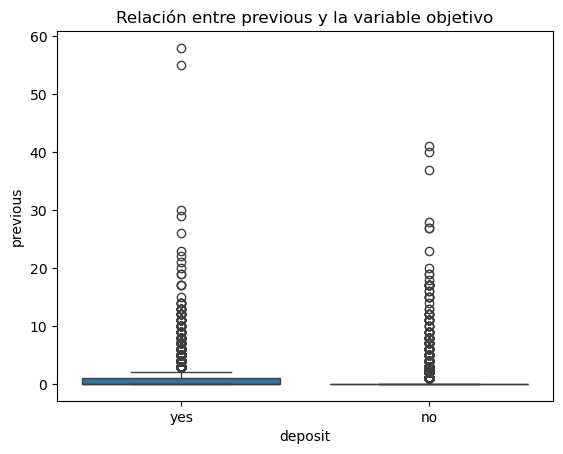

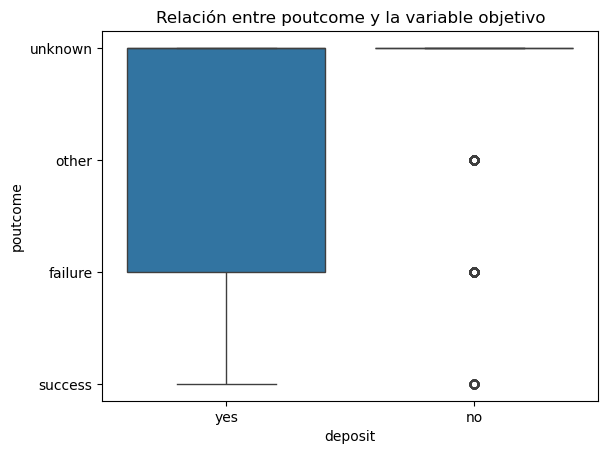

In [374]:
# Distribución de la variable objetivo
sns.countplot(x='deposit', data=data)
plt.title("Distribución de la variable objetivo")
plt.show()

# Relación entre la variable objetivo y otras
for column in data.columns:
    if column != 'deposit':  # Excluir la variable objetivo
        sns.boxplot(x='deposit', y=column, data=data)
        plt.title(f"Relación entre {column} y la variable objetivo")
        plt.show()

In [375]:
# Eliminar columnas
columns_to_drop = ['pdays', 'poutcome', 'default', 'loan', 'duration'] 
data_cleaned = data.drop(columns=columns_to_drop)

print("Primeras filas")
print(data_cleaned.head())

Primeras filas
    age         job  marital  education  balance housing  contact  day month  \
0  59.0      admin.  married  secondary     2343     yes  unknown    5   may   
1  56.0      admin.  married  secondary       45      no  unknown    5   may   
2  41.0  technician  married  secondary     1270     yes  unknown    5   may   
3  55.0    services  married  secondary     2476     yes  unknown    5   may   
4  54.0      admin.  married   tertiary      184      no  unknown    5   may   

   campaign  previous deposit  
0         1         0     yes  
1         1         0     yes  
2         1         0     yes  
3         1         0     yes  
4         2         0     yes  


Quedan 13 variables, pero como las variables categóricas deben codificarse generando matrices, el resultado final sería mucho más grande.
Por eso, necesitamos agrupar 'month' en estaciones.

In [376]:
# Agrupar month
# Diccionario para cambiar los meses a estaciones
mes_a_estacion = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Dec': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Autum', 'Oct': 'Autum', 'Nov': 'Autum'
}

data_cleaned['month'] = data_cleaned['month'].str.strip().str.title()
data_cleaned['month'] = data_cleaned['month'].map(mes_a_estacion)
print(data_cleaned['month'])

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
11157    Spring
11158    Summer
11159    Summer
11160    Spring
11161    Summer
Name: month, Length: 11162, dtype: object


## División del modelo

Dividir el conjunto de datos
Utilizaremos un 80% de los datos para entrenar nuestro modelo. Se necesita una gran cantidad de datos para entrenar el modelo, ya que tiene que relacionar variables y aprender patrones. Cuanto mayor número de datos proporcionemos, mejor será el modelo (siempre y cuando no haya overfitting).

Por otro lado, utilizaremos el 20% de los datos para testear el modelo. Es fundamental no utilizar estos datos para entrenar el modelo para ver si nuestro algoritmo tiene un buen deswempeño en datos no entrenados.

Es imprescindible la estratificación de la variable objetivo para que se mantenta igual en el conunto de entrenamiento que en el de prueba. Si no, podríamos tener un conunto de datos en los que las proporcionesde clases son diferentes.

In [377]:
X = data_cleaned.drop(columns='deposit')  # Variables
y = data_cleaned['deposit']               # Objetivo

# Partición estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar las proporciones en train y test
print("Proporciones en y_train:")
print(y_train.value_counts(normalize=True))

print("Proporciones en y_test:")
print(y_test.value_counts(normalize=True))

Proporciones en y_train:
deposit
no     0.526151
yes    0.473849
Name: proportion, dtype: float64
Proporciones en y_test:
deposit
no     0.526198
yes    0.473802
Name: proportion, dtype: float64


## Codificar variables categóricas
Como no podemos utilizar variables categóricas con texto, tenemos que codificarlas. Podemos clasificar nuestras variables categóricas como:
1. Ordinales: tienen un orden narutal (una jerarquía) --> Usamos label encoding
2. Nominales: no tienen orden natural y no se interpretan como valores numéricos --> Usamos one hot encoding
3. Booleanas: son de 'sí' o 'no' --> Usamos label encoding

#### Categóricas ordinales
Para las variables categóricas ordinales, como "education", podemos asignar un número a cada categoria.
Podemos utilizar LabelEncoder.

In [378]:
label_encoder = LabelEncoder()
education_encoded_train = label_encoder.fit_transform(X_train['education'])
print(education_encoded_train)

education_encoded_test = label_encoder.fit_transform(X_test['education'])
print("\n", education_encoded_test)

[1 2 1 ... 1 1 1]

 [2 1 1 ... 1 2 1]


#### Categóricas nominales
Por otro lado, tenemos variables categóricas nominales, como el tipo de trabajo, para lo que vamos a utilizar el One-hot encoding.
Recuerda que hemos eliminado 'pdays', 'poutcome', 'default', 'loan'.
Para la categoría job agruparemos en función de la educación necesaria para desempeñar el trabajo:
- Alta calificación: management, self-employed, entrepreneur
- Media calificación: admin., services, blue-collar
- Baja calificación: housemaid, student, retired

In [379]:
# Verificar valores originales antes del mapeo para train
print("Valores originales:", X_train['job'].unique())

# Limpiar la columna eliminando puntos y normalizando el formato
X_train['job'] = X_train['job'].str.strip().str.title().replace({'Admin.': 'Admin'})

# Diccionario con las claves ajustadas
job_to_qualification = {
    'Admin': 'Medium',
    'Blue-Collar': 'Medium',
    'Entrepreneur': 'High',
    'Housemaid': 'Low',
    'Management': 'High',
    'Retired': 'Low',
    'Self-Employed': 'High',
    'Services': 'Medium',
    'Student': 'Low',
    'Technician': 'High',
    'Unknown': 'Low',    
    'Unemployed': 'Low'
}

# Aplicar el mapeo
X_train['job'] = X_train['job'].map(lambda x: job_to_qualification.get(x, 'Medium'))

# Verificar después del mapeo
print("Valores mapeados:", X_train['job'].head())

Valores originales: ['admin.' 'technician' 'blue-collar' 'services' 'housemaid' 'management'
 'self-employed' 'retired' 'unknown' 'student' 'unemployed' 'entrepreneur']
Valores mapeados: 8644    Medium
2632    Medium
3056      High
1080      High
4006    Medium
Name: job, dtype: object


In [380]:
# Agrupar trabajo para test
X_test['job'] = X_test['job'].str.strip().str.title().replace({'Admin.': 'Admin'})
X_test['job'] = X_test['job'].map(lambda x: job_to_qualification.get(x, 'Medium'))

# Comprobamos primero que está bien
print(X_test.head())

       age     job  marital  education  balance housing   contact  day  \
8220  32.0    High  married   tertiary      393      no  cellular   28   
2521  36.0    High   single  secondary      376      no  cellular   13   
7949  52.0  Medium  married  secondary      722      no  cellular   26   
7879  35.0    High   single  secondary     -202     yes   unknown   20   
616   41.0  Medium  married  secondary     -190      no  cellular   29   

       month  campaign  previous  
8220  Winter         2         0  
2521  Summer         1         0  
7949   Autum         2         3  
7879  Spring         3         0  
616   Summer         3         0  


In [381]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['job', 'marital', 'contact', 'month']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Usar sparse_output=False para obtener una matriz densa
encoder.fit(X_train[categorical_cols])

# Transformar X_train y X_test a la vez
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Asegurar que X_test tenga las columnas en el mismo orden que X_train
X_test_encoded_df = X_test_encoded_df[X_train_encoded_df.columns]

### Categóricas booleanas

In [382]:
housing_encoded_train = X_train['housing'].map({'yes': 1, 'no': 0})
housing_encoded_test = X_test['housing'].map({'yes': 1, 'no': 0})

#### Variable objetivo

In [383]:
# Variable objetivo codificada train
deposit_encoded_train = y_train.map({'yes': 1, 'no': 0})
print(deposit_encoded_train)

# Variable objetivo codificada test
deposit_encoded_test = y_test.map({'yes': 1, 'no': 0})
print("\n", deposit_encoded_test)

8644    0
2632    1
3056    1
1080    1
4006    1
       ..
3751    1
9695    0
3579    1
3386    1
9743    0
Name: deposit, Length: 8929, dtype: int64

 8220     0
2521     1
7949     0
7879     0
616      1
        ..
11141    0
3589     1
4200     1
1959     1
903      1
Name: deposit, Length: 2233, dtype: int64


## Estandarización
Las variables numéricas pueden tener escalas muy diferentes (por ejemplo, ingresos en miles). La estandarización asegura que todas las variables numéricas tengan una escala similar, generalmente con media de 0 y desviación estándar de 1. 
Además, muchos algoritmos pueden ser sensibles a las escalas de las variables.

In [384]:
from sklearn.preprocessing import StandardScaler
# Selección
numeric_columns = ['balance', 'age', 'campaign']

scaler = StandardScaler() #creamos objeto
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns]) #tranformamos
print(X_train.head())

           age     job  marital  education   balance housing   contact  day  \
8644  0.411802  Medium  married  secondary -0.321431      no  cellular   31   
2632  0.411802  Medium  married   tertiary  0.359538      no  cellular    3   
3056 -1.357137    High   single  secondary -0.451508      no  cellular   11   
1080  0.159096    High  married  secondary  0.606919     yes  cellular   21   
4006 -0.346315  Medium   single    unknown -0.425291      no  cellular   23   

       month  campaign  previous  
8644  Summer  0.178481         0  
2632   Autum -0.540031         8  
3056  Winter -0.540031         1  
1080   Autum  0.178481         0  
4006   Autum -0.180775         0  


## Matriz de correlación

In [385]:
# df_nominal = pd.concat([job_encoded_df_train, marital_encoded_df_train, contact_encoded_df_train, month_encoded_df_train], axis=1)

if isinstance(education_encoded_train, (list, np.ndarray)):
    education_encoded_train = pd.DataFrame(education_encoded_train, columns=['education_encoded'])
df_ordinal_train = pd.concat([education_encoded_train], axis = 1)

numeric_columns = ['balance', 'age', 'campaign']
df_numeric_train = X_train[numeric_columns] 
df_bool_train = pd.concat([housing_encoded_train], axis = 1)

# Índices están alineados
#df_nominal_train = df_nominal_train.reset_index(drop=True)
X_train_encoded_df = X_train_encoded_df.reset_index(drop=True)
df_ordinal_train = df_ordinal_train.reset_index(drop=True)
df_numeric_train = df_numeric_train.reset_index(drop=True)
df_bool_train = df_bool_train.reset_index(drop=True)

# Combinar todos los DataFrames
df_final_train = pd.concat([X_train_encoded_df, df_ordinal_train, df_numeric_train, df_bool_train], axis=1)
df_final_train.dropna(inplace=True)

# Exportar a un archivo CSV
df_final_train.to_csv("train_encoded.csv", index=False)

print("Archivo CSV creado con éxito: train_encoded.csv")
train_encoded = pd.read_csv('train_encoded.csv')
print(train_encoded.head())

Archivo CSV creado con éxito: train_encoded.csv
   job_High  job_Low  job_Medium  marital_divorced  marital_married  \
0       0.0      0.0         1.0               0.0              1.0   
1       0.0      0.0         1.0               0.0              1.0   
2       1.0      0.0         0.0               0.0              0.0   
3       1.0      0.0         0.0               0.0              1.0   
4       0.0      0.0         1.0               0.0              0.0   

   marital_single  contact_cellular  contact_telephone  contact_unknown  \
0             0.0               1.0                0.0              0.0   
1             0.0               1.0                0.0              0.0   
2             1.0               1.0                0.0              0.0   
3             0.0               1.0                0.0              0.0   
4             1.0               1.0                0.0              0.0   

   month_Autum  month_Spring  month_Summer  month_Winter  education_encode

In [386]:
# Ponemos igual todos los indices train
# Reindexar sin añadir NaN (usamos fill_value=0 si hay índices faltantes en deposit_encoded_test)
deposit_encoded_train = deposit_encoded_train.reindex(df_final_train.index, fill_value=0)
# Verificar que los índices son iguales después de la reindexación
print("\n Index coincide después de la reindexación:")
print(df_final_train.index.equals(deposit_encoded_train.index))

# Reindexar sin añadir NaN (usamos fill_value=0 si hay índices faltantes en deposit_encoded_test)
deposit_encoded_test = deposit_encoded_test.reindex(df_final_test.index, fill_value=0)
# Verificar que los índices son iguales después de la reindexación
print("\n Index coincide después de la reindexación:")
print(df_final_test.index.equals(deposit_encoded_test.index))


 Index coincide después de la reindexación:
True

 Index coincide después de la reindexación:
True


0       1
3337    1
3359    1
3358    1
3356    1
       ..
5795    0
5794    0
5793    0
5792    0
8928    0
Name: deposit, Length: 8929, dtype: int64


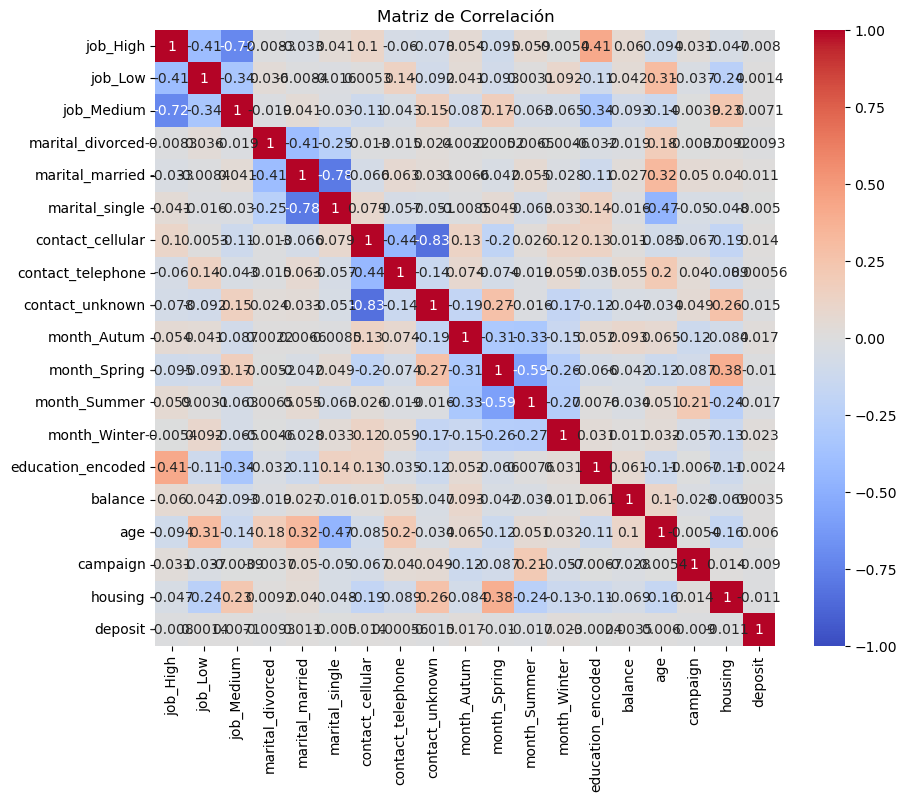

In [387]:
# Unimos en un df todo
df_correlation = pd.concat([df_final_train, deposit_encoded_train], axis=1)
df_correlation.dropna(inplace=True)

# Como tenemos muchas variables, el heatmap filtra columnas con una alta correlación con deposit_encoded
correlation = df_correlation.corr()
target_corr = df_correlation['deposit'].sort_values(ascending=False)
print(target_corr)


# Visualitzar la matriu de correlació amb un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

Al observar la matriz de correlación, parece que ninguna de las variables tiene una correlación significativa con la variable objetivo deposit. 

La correlación más alta (en valor absoluto) con deposit es cercana a cero, lo que sugiere una baja relación lineal.

La correlación de Pearson (por defecto) mide relaciones lineales, pero puede ser que las relaciones entre las variables y el objetivo sean no lineales.


In [388]:
correlation_spearman = df_correlation.corr(method='spearman')
target_corr_spearman = correlation_spearman['deposit'].sort_values(ascending=False)
print(target_corr_spearman)

df_final_train.describe()

deposit              1.000000
month_Winter         0.022944
balance              0.017704
month_Autum          0.017085
contact_cellular     0.013653
marital_married      0.010625
job_Medium           0.007089
age                  0.006288
job_Low              0.001446
contact_telephone    0.000562
education_encoded   -0.001235
campaign            -0.004625
marital_single      -0.004960
job_High            -0.007955
marital_divorced    -0.009262
month_Spring        -0.010066
housing             -0.011189
contact_unknown     -0.015384
month_Summer        -0.017210
Name: deposit, dtype: float64


,job_High,job_Low,job_Medium,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,month_Autum,month_Spring,month_Summer,month_Winter,education_encoded,balance,age,campaign,housing
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8.929000e+03,8.929000e+03,8.929000e+03,8929.000000
mean,0.461754,0.164408,0.373838,0.114906,0.565237,0.319857,0.720797,0.069101,0.210102,0.147945,0.363647,0.380110,0.108299,1.288834,-6.366157e-18,5.029264e-16,-7.321081e-17,0.473625
std,0.498563,0.370666,0.483849,0.318927,0.495754,0.466447,0.448632,0.253639,0.407404,0.355065,0.481076,0.485441,0.310775,0.752988,1.000056e+00,1.000056e+00,1.000056e+00,0.499332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.799611e+00,-1.946783e+00,-5.400311e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.572221e-01,-7.674905e-01,-5.400311e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3.126924e-01,-1.778443e-01,-1.807748e-01,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,7.115141e-02,6.645074e-01,1.784814e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.679569e+01,4.539325e+00,2.173386e+01,1.000000


Hemos realizado una correlación no lineal y tampoco parece que la variable deposit tenga ninguna relación fuerte con el resto de variables.

## PCA
Como no hemos encontrado relaciones lineales y no lineales en train, vamos a probar un PCA para ver si algunas variables tienen baja o nula relevancia.

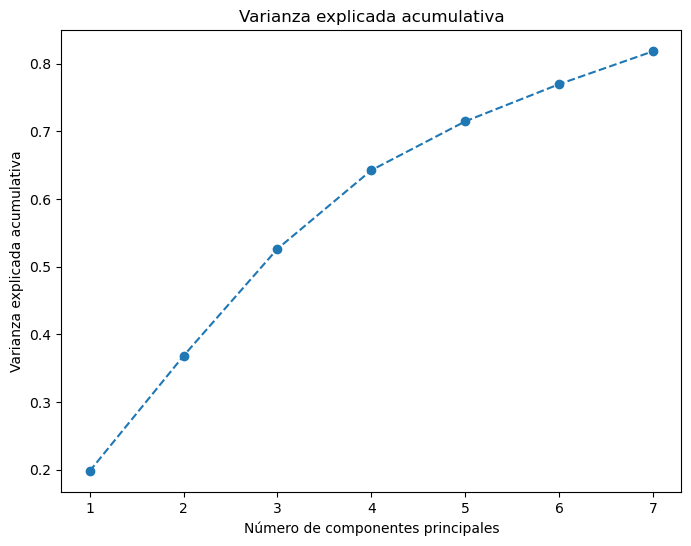

In [389]:
from sklearn.feature_selection import SelectPercentile, f_classif

pca = PCA(n_components=0.80)  # Por ejemplo, retener el 95% de la varianza
df_pca = pca.fit_transform(df_final_train)

pca_components = pd.DataFrame(pca.components_, columns=df_final_train.columns)

# Gráfico de varianza
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

Según el gráfico, 6 componentes explicarían casi el 80% de la variancia de los datos.

Si quisiéramos, podríamos añadir un séptimo componente para explicar aún más la varianza (82%).

## Aplicamos a test

In [390]:
if isinstance(education_encoded_test, (list, np.ndarray)):
    education_encoded_test = pd.DataFrame(education_encoded_test, columns=['education_encoded'])
df_ordinal_test = pd.concat([education_encoded_test], axis = 1)

numeric_columns = ['balance', 'age', 'campaign']
df_numeric_test = X_test[numeric_columns] 
df_bool_test = pd.concat([housing_encoded_test], axis = 1)

# Índices están alineados
X_test_encoded_df = X_test_encoded_df.reset_index(drop=True)
df_ordinal_test = df_ordinal_test.reset_index(drop=True)
df_numeric_test = df_numeric_test.reset_index(drop=True)
df_bool_test = df_bool_test.reset_index(drop=True)

# Combinar todos los DataFrames
df_final_test = pd.concat([X_test_encoded_df, df_ordinal_test, df_numeric_test, df_bool_test], axis=1)

df_final_test.dropna(inplace=True)

# Estandarización
numeric_columns = ['balance', 'age', 'campaign']
scaler = StandardScaler() #creamos objeto
df_final_test[numeric_columns] = scaler.fit_transform(df_final_test[numeric_columns]) #tranformamos

# Exportar a un archivo CSV
df_final_test.to_csv("test_encoded.csv", index=False)

print("Archivo CSV creado con éxito: test_encoded.csv")
test_encoded = pd.read_csv('test_encoded.csv')
print(test_encoded.head())

Archivo CSV creado con éxito: test_encoded.csv
   job_High  job_Low  job_Medium  marital_divorced  marital_married  \
0       1.0      0.0         0.0               0.0              1.0   
1       1.0      0.0         0.0               0.0              0.0   
2       0.0      0.0         1.0               0.0              1.0   
3       1.0      0.0         0.0               0.0              0.0   
4       0.0      0.0         1.0               0.0              1.0   

   marital_single  contact_cellular  contact_telephone  contact_unknown  \
0             0.0               1.0                0.0              0.0   
1             1.0               1.0                0.0              0.0   
2             0.0               1.0                0.0              0.0   
3             1.0               0.0                0.0              1.0   
4             0.0               1.0                0.0              0.0   

   month_Autum  month_Spring  month_Summer  month_Winter  education_encoded

## Conclusión
A pesar de que en teoría no es necesario realizar un PCA porque debería tener 4 o 5 variables que explicaran la varianza de la variable objetivo, no he sido capaz de determinarlos mediante una matriz de correlación.

Por eso he realizado un PCA, que parece ser linear para los 4 primeros componentes.


## Entrenar el modelo

In [400]:
# Librería
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [398]:
# Concatenar X con y
training = pd.concat([df_final_train, deposit_encoded_train], axis=1)
testing = pd.concat([df_final_test, deposit_encoded_test], axis=1)

In [401]:
# Especificar las columnas para características y variable objetivo
feature_columns = training.drop('deposit', axis=1)  # características
target_column = 'deposit'

# Separar características (X) y variable objetivo (y) en el conjunto de entrenamiento
X_train = training.drop('deposit', axis=1)  # características
y_train = training['deposit']

# Separar características (X) y variable objetivo (y) en el conjunto de prueba
X_test = testing.drop('deposit', axis=1)  # obj
y_test = testing['deposit']

# Crear el modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Ajustar el modelo con los datos de entrenamiento
# error aquí
rf_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del Modelo:")
print(accuracy_score(y_test, y_pred))

# Importancia de las características
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': rf_classifier.feature_importances_}
).sort_values(by='Importance', ascending=False)

print("\nImportancia de las características:")
print(feature_importances)
# Las métricas sugieren que el modelo funciona bien. Vamos a ajustarlo con el conjunto de entrenamiento completo.

Matriz de Confusión:
[[1016  775]
 [ 240  202]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67      1791
           1       0.21      0.46      0.28       442

    accuracy                           0.55      2233
   macro avg       0.51      0.51      0.48      2233
weighted avg       0.69      0.55      0.59      2233


Precisión del Modelo:
0.5454545454545454

Importancia de las características:
              Feature  Importance
14            balance    0.386906
15                age    0.287725
16           campaign    0.114675
13  education_encoded    0.057944
17            housing    0.024832
4     marital_married    0.012460
0            job_High    0.012153
2          job_Medium    0.011682
10       month_Spring    0.011282
11       month_Summer    0.011028
5      marital_single    0.010780
6    contact_cellular    0.010046
1             job_Low    0.009441
3    marital_divorced    0.008935
9        

La **matriz de confusión** es una tabla que muestra el rendimiento del modelo clasificando ejemplos positivos (clase 1) y negativos (clase 0).
- 44 (TP - Verdaderos Positivos): Casos correctamente clasificados como clase 0.
- 218 (FP - Falsos Positivos): Casos de clase 0 incorrectamente clasificados como clase 1.
- 117 (FN - Falsos Negativos): Casos de clase 1 incorrectamente clasificados como clase 0.
- 954 (TN - Verdaderos Negativos): Casos correctamente clasificados como clase 1.

Esto indica que el modelo tiene buen desempeño general para verdaderos negativos, pero todavía comete errores en ambas clases.


El **informe de clasificación** incluye métricas clave para cada clase (0 y 1).
Clase 0:
- Precision: De todos los ejemplos que el modelo predijo como clase 0, el 89% realmente eran clase 0.
- Recall: De todos los ejemplos reales de clase 0, el modelo identificó correctamente el 81%.
- F1-Score: Media armónica entre precisión y recall, que penaliza más los desequilibrios entre ellas. Es 0.85 para la clase 0.

Clase 1:
- Precision: De todos los ejemplos que el modelo predijo como clase 1, el 81% realmente eran clase 1.
- Recall: De todos los ejemplos reales de clase 1, el modelo identificó correctamente el 89%.
- F1-Score: También es 0.85, lo que refleja un balance similar entre precisión y recall para la clase 1.

Promedios:
- Accuracy: El modelo clasifica correctamente el 85% de los ejemplos totales.
- Macro avg: promedio de 85%
- Weighted avg: promedio de 85%

Precisión del modelo: El valor 0.8499776 coincide con la precisión global del modelo, que es la proporción de predicciones correctas.

Importancia de las características:
- Según el modelo de Random Forest Classificator, la variable más importante es la duración ('duration') de la campaña, seguida del balance, la edad y el día.

## Summary
- El modelo tiene precisión y recall balanceados (0.85).
- El modelo funciona bien para ambas clases, aunque tiene un ligero sesgo a favor de la clase 1.
- La caracerística más importante para el modelo es duration. Por tanto, lo más importante para poder incrementar el número de clientes que aceptan 'deposit', es incrementar también la duración de la campaña.
- A mejorar: puede reducir los falsos positivos (FP = 218) y falsos negativos (FN = 117), lo que implica ajustar el umbral de clasificación o explorar técnicas adicionales